<a href="https://colab.research.google.com/github/M2kishore/Covid_Detection_using_CT_scans_ML/blob/M2kishore-dataset-with-file-lable/Covid_Detection__using_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from glob import glob
import cv2
import PIL
import tqdm
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets
from skimage.filters import gabor
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# %cd /content/drive/MyDrive/Amrita/Semester 6/semester_projects/Machine Learning/Dataset/

In [ ]:
# %ls

In [ ]:
# #define size to which images are to be resized
# IMAGE_SIZE = [200, 200] # feel free to change depending on dataset

# # training config:
# epochs = 500
# batch_size = 32

# #define paths
# covid_path = 'COVID'
# noncovid_path = 'non-COVID'

# # Use glob to grab images from path .jpg or jpeg
# covid_files = glob(covid_path + '/*')
# noncovid_files = glob(noncovid_path + '/*')

In [ ]:
# print("First 5 Covid Files: ",covid_files[0:5])
# print("Total Count: ",len(covid_files))
# print("First 5 NonCovid Files: ",noncovid_files[0:5])
# print("Total Count: ",len(noncovid_files))

In [ ]:
# #lables generation
# covid_labels = []
# noncovid_labels = []
# for i in range(len(covid_files)):
#   covid_labels.append("covid")
# for i in range(len(covid_files)):
#   noncovid_labels.append("noncovid")

In [ ]:
# files = covid_files + noncovid_files
# lables = covid_labels + noncovid_labels
# df = pd.DataFrame(list(zip(files, lables)),columns =['Files', 'Lables'])
# df = df.sample(frac=1, random_state=42) #shuffle dataset

In [ ]:
# df.head()

In [ ]:
# print(df["Files"][5])
# image = cv2.imread(df["Files"][5])
# plt.imshow(image)

In [ ]:
# label = []
# featLength = 2+5+2
# trainFeats = np.zeros((len(df),featLength)) #Feature vector of each image is of size 1x1030
# for index in tqdm.tqdm_notebook(range(len(df))):
#     img = PIL.Image.open(df["Files"][index]) #One image at a time
#     img = img.resize((IMAGE_SIZE[0],IMAGE_SIZE[1]))
#     img_gray = img.convert('L') #Converting to grayscale
#     img_arr = np.array(img_gray.getdata()).reshape(img.size[1],img.size[0]) #Converting to array
#     # LBP
#     feat_lbp = local_binary_pattern(img_arr,5,2,'uniform').reshape(img.size[0]*img.size[1])
#     lbp_hist,_ = np.histogram(feat_lbp,8)
#     lbp_hist = np.array(lbp_hist,dtype=float)
#     lbp_prob = np.divide(lbp_hist,np.sum(lbp_hist))
#     lbp_energy = np.nansum(lbp_prob**2)
#     lbp_entropy = -np.nansum(np.multiply(lbp_prob,np.log2(lbp_prob)))   
#     # GLCM
#     gCoMat = greycomatrix(img_arr, [2], [0],256,symmetric=True, normed=True)
#     contrast = greycoprops(gCoMat, prop='contrast')
#     dissimilarity = greycoprops(gCoMat, prop='dissimilarity')
#     homogeneity = greycoprops(gCoMat, prop='homogeneity')    
#     energy = greycoprops(gCoMat, prop='energy')
#     correlation = greycoprops(gCoMat, prop='correlation')    
#     feat_glcm = np.array([contrast[0][0],dissimilarity[0][0],homogeneity[0][0],energy[0][0],correlation[0][0]])
#     # Gabor filter
#     gaborFilt_real,gaborFilt_imag = gabor(img_arr,frequency=0.6)
#     gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2
#     gabor_hist,_ = np.histogram(gaborFilt,8)
#     gabor_hist = np.array(gabor_hist,dtype=float)
#     gabor_prob = np.divide(gabor_hist,np.sum(gabor_hist))
#     gabor_energy = np.nansum(gabor_prob**2)
#     gabor_entropy = -np.nansum(np.multiply(gabor_prob,np.log2(gabor_prob)))
#     # Concatenating features(2+5+2)    
#     concat_feat = np.concatenate(([lbp_energy,lbp_entropy],feat_glcm,[gabor_energy,gabor_entropy]),axis=0)
#     trainFeats[index,:] = concat_feat #Stacking features vectors for each image
#     # Class label
#     label.append(df["Lables"][index])
# trainLabel = np.array(label) #Conversion from list to array

In [ ]:
# # Normalizing the train features to the range [0,1]
# trMaxs = np.amax(trainFeats,axis=0) #Finding maximum along each column
# trMins = np.amin(trainFeats,axis=0) #Finding maximum along each column
# trMaxs_rep = np.tile(trMaxs,(2481,1)) #Repeating the maximum value along the rows
# trMins_rep = np.tile(trMins,(2481,1)) #Repeating the minimum value along the rows
# trainFeatsNorm = np.divide(trainFeats-trMins_rep,trMaxs_rep) #Element-wise division
# # Normalizing the test features
# tsMaxs_rep = np.tile(trMaxs,(10000,1)) #Repeating the maximum value along the rows
# tsMins_rep = np.tile(trMins,(10000,1)) #Repeating the maximum value along the rows
# testFeatsNorm = np.divide(testFeats-tsMins_rep,tsMaxs_rep) #Element-wise division

In [ ]:
# with open("trainFeats.pckl", "wb") as f:
#     pickle.dump(trainFeatsNorm, f)
# with open("trainLabel.pckl", "wb") as f:
#     pickle.dump(trainLabel, f)
    
# # Saving normalized testing data and labels
# with open("testFeats.pckl", "wb") as f:
#     pickle.dump(testFeatsNorm, f)
# with open("testLabel.pckl", "wb") as f:
#     pickle.dump(testLabel, f)
    
# print('Files saved to disk!')

In [ ]:
%ls

COVID/                 non-COVID/           trainFeats.pckl
feature_extracted.csv  patches_dataset.csv  trainLabel.pckl
feature_patch_1.csv    testFeats.pckl


In [197]:
X = pd.read_pickle('trainFeats.pckl')
Y = pd.read_pickle('trainLabel.pckl')
X = pd.DataFrame(X,columns=['lbp_energy','lbp_entropy','glcm_contrast','glcm_dissimilarity','glcm_homogeniety','glcm_energy','glcm_correlation','gabor_energy','gabor_entropy'])
Y = pd.DataFrame(Y,columns=['labels'])

#Visualization#

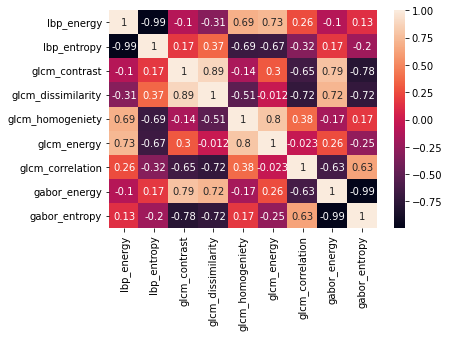

In [198]:
sns.heatmap(X.corr(), annot = True)

Sampling and Randomize Testing

In [199]:
#X = X.sample(frac=1,random_state=42)
#Y = Y.sample(frac = 1,random_state=42)

In [200]:
print(X.head())
print(Y.head())

   lbp_energy  lbp_entropy  ...  gabor_energy  gabor_entropy
0    0.017236     0.121773  ...      0.581479       0.183241
1    0.017855     0.121603  ...      0.538920       0.234313
2    0.046370     0.110524  ...      0.635952       0.114182
3    0.051455     0.109109  ...      0.447744       0.336196
4    0.024237     0.118902  ...      0.500625       0.266753

[5 rows x 9 columns]
  labels
0  covid
1  covid
2  covid
3  covid
4  covid


Lable Encoding Y

In [202]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

Y['labels']= label_encoder.fit_transform(Y['labels'])
 

Dataset Splitting

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Helper Functions

In [204]:
def predictionBinarizer(y_predict,threshold =0.5):
  y_predict = y_predict.ravel()
  for i in range(len(y_predict)):
    if y_predict[i] >= threshold:
      y_predict[i] = 1
    else:
      y_predict[i] = 0
  return y_predict

Using Random Forest

In [207]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1)
model.fit(X_train,Y_train)

Y_predict = model.predict(X_test)

Y_predict = predictionBinarizer(Y_predict)

acc = accuracy_score(Y_test, Y_predict) * 100
print('Accuracy: %.3f' % acc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy: 88.531


Using Linear Regression

In [206]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

Y_predict = model.predict(X_test)

Y_predict = predictionBinarizer(Y_predict)

acc = accuracy_score(Y_test, Y_predict) * 100
print('Accuracy: %.3f ' % acc)

Accuracy: 78.270 
